# Chapter 2: Simple Linear Regression Exercise 🎯

## Learning Objectives
After completing this exercise, you will be able to:
- Apply Simple Linear Regression to a real business problem
- Analyze advertising data to predict sales
- Compare different advertising channels' effectiveness
- Make data-driven recommendations for budget allocation

This exercise will help you put your theoretical knowledge into practice with a real-world business case!

In [1]:
%reset
low_memory=False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2.1 Introduction & Motivation

### 🚀 Time to Put Theory into Practice!

Now that you understand the concepts of linear regression, it's time to apply them to a real business problem! 

In this exercise, you'll step into the shoes of a data scientist working for a company that wants to optimize their advertising budget. You'll:
1. Analyze their advertising data
2. Build predictive models
3. Help them make better decisions about where to spend their money

Remember:
- Use the knowledge from the previous notebook
- Think critically about the business context
- Focus on practical insights that can help decision-making

Let's dive in and help this company make data-driven decisions! 📊

## 2.2 Problem setting

### 🏢 The Business Case: Contoso's Advertising Challenge

Meet Contoso, a company that wants to optimize their advertising strategy. Here's their situation:

#### Current Scenario
- They advertise across three channels: 📺 TV, 📻 Radio, and 📰 Newspaper
- They track monthly sales data (in thousands of units)
- They record advertising spend (in thousands of dollars) for each channel
- They need help understanding which advertising channels are most effective

#### Your Role
As a data scientist, you'll help Contoso:
1. Analyze the relationship between advertising spend and sales
2. Build models to predict sales based on advertising
3. Determine which channels give the best return on investment

#### The Data
You'll work with a dataset containing:
- Sales figures (dependent variable)
- Advertising spend on TV (independent variable)
- Advertising spend on Radio (independent variable)
- Advertising spend on Newspaper (independent variable)

Let's help Contoso make smarter advertising decisions! 💡

## 2.3 Model

Go to canvas and donload the file "Advertising.csv" from module 2. This data contains the required dataset.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 🤔 Initial Data Analysis

#### Question 1: Exploring the Dataset
Look at the columns and data carefully. Think like a business analyst:
- What should we predict? (dependent variable)
- What data can we use to make predictions? (independent variables)
- Which predictions would be most valuable for the business?

**Your Analysis:**
The most valuable prediction would be sales figures, as this directly impacts business decisions. We can use the advertising spend data (TV, Radio, Newspaper) as our predictors. This could help Contoso optimize their advertising budget allocation.

#### Question 2: Thinking About the Model
Before we start plotting, let's think about the real-world relationship between advertising and sales:
- Would you expect linear regression to work here? Why?
- What kind of relationship would you expect between ad spend and sales?
- Are there any limitations to consider?

**Your Analysis:**
Linear regression makes sense here because:
1. More advertising typically leads to more sales (positive relationship)
2. This relationship is often somewhat proportional
3. We expect each additional dollar spent to have a similar impact (within reasonable limits)

Before we train this new model, we first want to create a column where all our information is stored. We will call this column 'total_spent'.

Since we are working with an actual dataset, we also want to split our data. in a train and a test set. This ensure we can properly evaluate our model and test in on data it has never seen before.

In [3]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper']

X = df['total_spent'].to_numpy().reshape(-1, 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 🔍 Understanding Model Parameters

#### Question 3: Deep Dive into Model Parameters
Let's understand the parameters in our `train_test_split` function:

1. **test_size Parameter**
   - What it does: Determines what portion of data is used for testing
   - Range: Must be between 0 and 1 (represents percentage)
   - Impact: Larger test size means:
     - More data for validation
     - Less data for training
     - Need to find the right balance!

2. **random_state Parameter**
   - What it does: Controls the randomization of the split
   - Values: Can be any integer
   - Effects:
     - Same number = Same split every time
     - No parameter = Different split each time
   
3. **When to Use What?**
   - Use fixed random_state for:
     - Learning and teaching
     - Reproducing results
     - Debugging code
   - Skip random_state for:
     - Production models
     - When you want to test robustness
     - Cross-validation scenarios

Review the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details!

Now that you have prepared your data it's time to train the model. Make sure to only use the training data!

In [4]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Question 4:  Plot a graph to show the amount of sales in function of the total amount spent on advertising. Draw a line using Beta 0 and Beta 1 to show our model. Does this confirm/deny your earlier assumptions about whether or not to choose linear regression?

Text(0, 0.5, 'Y')

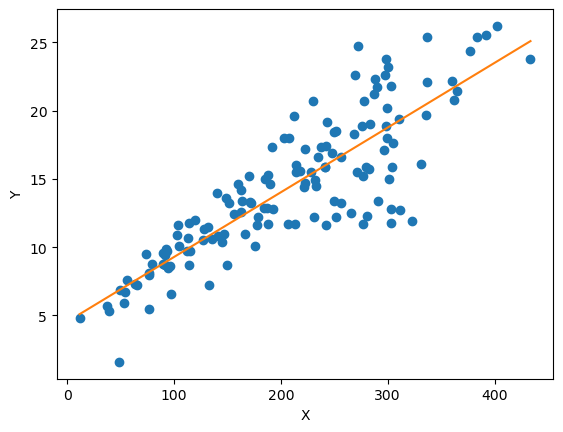

In [5]:
min_pt = X_train.min() * model.coef_[0] + model.intercept_
max_pt = X_train.max() * model.coef_[0] + model.intercept_
plt.plot(X_train, y_train, 'o')
plt.plot([X_train.min(), X_train.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")

## 2.4 Model Evaluation

### 📊 Model Evaluation Time!

Now comes the exciting part - how well does our model perform? Let's evaluate it using R² (R-squared).

#### Question 5: Interpreting the R² Score
After calculating the R² score, analyze:

1. **What does R² tell us?**
   - It measures how well our model explains the variation in sales
   - Range: 0% (terrible) to 100% (perfect)

2. **How to interpret the score:**
   - Below 30%: Weak relationship
   - 30-70%: Moderate relationship
   - Above 70%: Strong relationship

3. **Business perspective:**
   - How much of the sales variation is explained by advertising?
   - Is this good enough for making business decisions?
   - What other factors might influence sales?

In [6]:
model.score(X_train, y_train)

0.73228658313651

The value of $R^2$ is 0,73. This means about 73% of our values get explained by the model. It's not great, but not terrible either.

### 🎯 Beyond R²: Understanding MSE

While R² gives us a good overall picture, the Mean Squared Error (MSE) provides a different perspective on our model's performance.

#### Why MSE is Important
1. **Practical Interpretation**
   - MSE is in the same units as our sales (squared)
   - Helps understand the typical prediction error
   - Larger errors are punished more heavily

2. **Business Context**
   - How far off are our sales predictions typically?
   - Are we consistently close or do we have big misses?
   - How costly would these prediction errors be?

Let's calculate the MSE and see what it tells us about our model's accuracy!

##### Question 6: Calculate the MSE. Remember that we kept some test data on the side exactly for this purpose!

In [7]:
test_predictions = model.predict(X_test)
MSE = mean_squared_error(y_test,test_predictions)
MSE

5.92166016091218

### 🔄 Training vs Testing Performance

#### Question 7: Comparing MSE Values
Calculate and compare the MSE for both training and test data:

1. **What to Look For:**
   - Is the training MSE lower than the test MSE?
   - How big is the difference?
   - What does this tell us about our model?

2. **Common Patterns:**
   - Training MSE < Test MSE: Normal (model performs better on data it's seen)
   - Training MSE >> Test MSE: Possible overfitting
   - Training MSE ≈ Test MSE: Good generalization

3. **In Linear Regression:**
   - Small differences are normal
   - Very similar values can indicate good model stability
   - Random variations might make test MSE slightly better sometimes

In [8]:
test_predictions2 = model.predict(X_train)
MSE2 = mean_squared_error(y_train,test_predictions2)
MSE2

7.045187801076913

The MSE of the model used on training data is higher than the one on test data. Typically we would expect it the other way around, meaning the model would perform better on data it has already seen. However, since we are working in linear regression, we can attribute this to random noise. If anything this is a sign our model is certainly not overfitting.

## 2.5 Exercises

##### Question 1: See section 2.3
##### Question 2: See section 2.3
##### Question 3: See section 2.3
##### Question 4: See section 2.3
##### Question 5: See section 2.4
##### Question 6: See section 2.4
##### Question 7: See section 2.4
##### Question 8: Our next ad campaign will have a total spend of 236k on advertisement, how many units could we expect to sell as a result of this?**

In [10]:
prediction = model.predict([[236]])
prediction

array([15.72459273])

The model predicts that when we spend a total of 236 on advertisement, we will sell 15,7k units of product.
##### Question 9: In our current model we have created a new table for the total amount of advertisement. However, it is likely that The seperate budget columns have a different influence on our model. Create a model for each budget column and plot it. Compare their performance using $R^2$ and the MSE on test data. What do you notice?

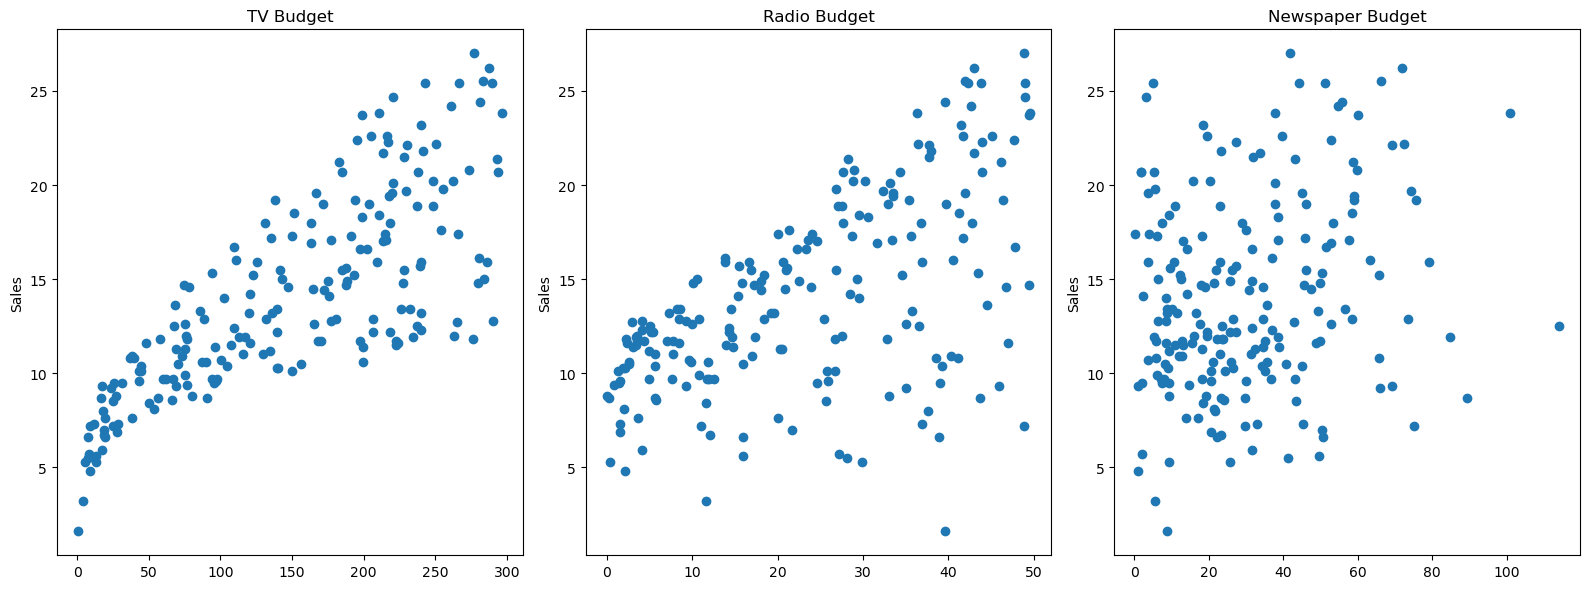

In [11]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Budget")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Budget")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Budget");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [12]:
X_tv = df['TV'].to_numpy().reshape(-1, 1)
X_radio = df['radio'].to_numpy().reshape(-1, 1)
X_newspaper = df['newspaper'].to_numpy().reshape(-1, 1)
y = df['sales']

X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.3, random_state=101)
X_train_radio, X_test_radio, y_train_radio, y_test_radio = train_test_split(X_radio, y, test_size=0.3, random_state=101)
X_train_newspaper, X_test_newspaper, y_train_newspaper, y_test_newspaper = train_test_split(X_newspaper, y, test_size=0.3, random_state=101)

model_tv = LinearRegression().fit(X_train_tv,y_train_tv)
model_radio = LinearRegression().fit(X_train_radio,y_train_radio)
model_newspaper = LinearRegression().fit(X_train_newspaper,y_train_newspaper)

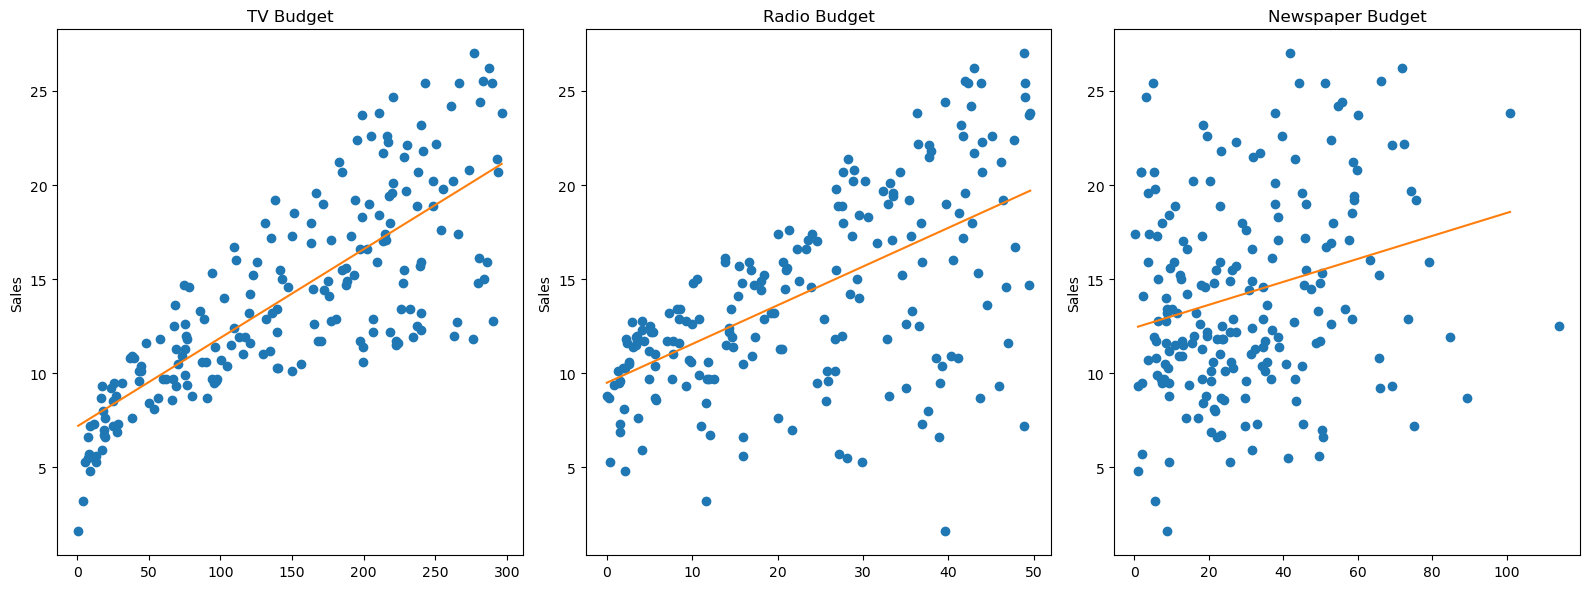

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

min_pt_tv = model_tv.predict([[X_train_tv.min()]])
max_pt_tv = model_tv.predict([[X_train_tv.max()]])
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot([X_train_tv.min(), X_train_tv.max()], [min_pt_tv, max_pt_tv])
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Budget')

min_pt_radio = model_radio.predict([[X_train_radio.min()]])
max_pt_radio = model_radio.predict([[X_train_radio.max()]])
axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot([X_train_radio.min(), X_train_radio.max()], [min_pt_radio, max_pt_radio])
axes[1].set_title('Radio Budget')
axes[1].set_ylabel('Sales')

min_pt_newspaper = model_newspaper.predict([[X_train_newspaper.min()]])
max_pt_newspaper = model_newspaper.predict([[X_train_newspaper.max()]])
axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot([X_train_newspaper.min(), X_train_newspaper.max()], [min_pt_newspaper, max_pt_newspaper])
axes[2].set_title('Newspaper Budget');
axes[2].set_ylabel('Sales')
plt.tight_layout();

In [14]:
r_tv = model_tv.score(X_train_tv, y_train_tv)
r_radio = model_radio.score(X_train_radio, y_train_radio)
r_newspaper = model_newspaper.score(X_train_newspaper, y_train_newspaper)

print(' R2 for tv:', r_tv, '\n R2 for radio:', r_radio, '\n R2 for newspaper', r_newspaper)

 R2 for tv: 0.5969856732137406 
 R2 for radio: 0.34969819733576046 
 R2 for newspaper 0.06487017361800473


We see that the $R^2$ of our tv model is the highest, followed by the radio model and lastly the newspaper model. Our TV model still has a relatively acceptable score. However, the radio model already seems a lot worse and the newspaper model only explains 6% of all data. This is terrible and this this last model is no good for predicting things.

We can conclude form this that there is a linear connection between tv budget and total sales, somewhat of a linear connection between radio budget and total sales but not really any connection between newspaper budget and sales.

In [15]:
test_predictions_tv = model_tv.predict(X_test_tv)
MSE_tv = mean_squared_error(y_test_tv,test_predictions_tv)
test_predictions_radio = model_radio.predict(X_test_radio)
MSE_radio = mean_squared_error(y_test_radio,test_predictions_radio)
test_predictions_newspaper = model_newspaper.predict(X_test_newspaper)
MSE_newspaper = mean_squared_error(y_test_newspaper,test_predictions_newspaper)

print(' MSE for tv:', MSE_tv, '\n MSE for radio:', MSE_radio, '\n MSE for newspaper', MSE_newspaper)

 MSE for tv: 10.318455423013349 
 MSE for radio: 20.60701878516741 
 MSE for newspaper 28.439361834003417


Our conclusion made based on the score of $R^2$ are confirmed when comparing the models using the MSE. When comparing the newly found scores to the MSe of our earlier model (7.045187801076913), we see that there is value to be gained using all cumulative data even though it may seem like there is no linear connection (e.g. newspaper budget).

We can however use this data to conclude that tv budget is a more stable and predictible investment, leading us to possibly invest more in tv than in newspapers from now on.
##### Question 10: When we calculate the total budget, we technically have all the data in one column. However, it might be possible that there is extra value to gain when keeping the columns seperate. Build a single model with three distinct features (TV, Radio and Newspaper). Plot the model and evaluate it using $R^2$. Is this an improvement? Test the model on test data and calculate the MSE. Compare this to our current model. Is there an improvement here?

Text(0, 0.5, 'Sales')

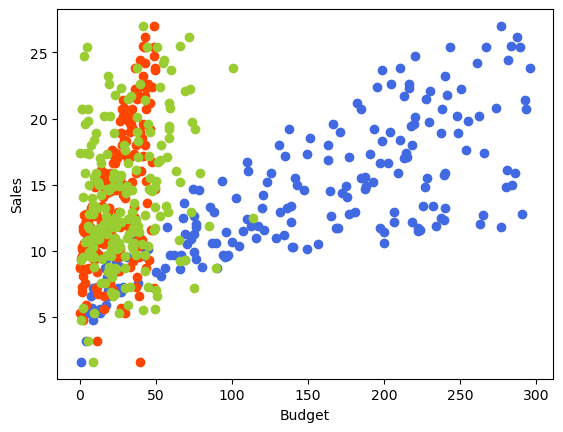

In [16]:
plt.plot(df['TV'], df['sales'], 'o', color='royalblue')
plt.plot(df['radio'], df['sales'], 'o', color='orangered')
plt.plot(df['newspaper'], df['sales'], 'o', color='yellowgreen')
plt.xlabel('Budget')
plt.ylabel('Sales')

In [17]:
X_full = df.drop('sales', axis=1).drop('total_spent', axis=1)
y_full = df['sales']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=101)

model_full = LinearRegression().fit(X_train_full,y_train_full)

In [18]:
r_full = model_full.score(X_train_full, y_train_full)

r_full

0.8856665510409361

The $R^2$ value of our new model is 0,885. This means that about 88,5% of our data gets explained by the model. This is a huge improvement over the models of each individual column and even an improvement over our earlier model.

In [19]:
test_predictions_full = model_full.predict(X_test_full)
MSE_full = mean_squared_error(y_test_full,test_predictions_full)

MSE_full

2.298716697886379

Once more the conclusion we made when comparing the $R^2$ of our models is supported by comparing the MSE of our models. We see an improvement compared to the models of each individual column, but also an improvement over our original model.

Based on, this, we can conclude that there is a lot of value to be gained from having data from all columns seperate. While some columns have a clear linear connection, on their own they are lacking crucial information. Some columns have this crucial extra information but have almost no linear connection on their own. Combining all data into a single column keeps all data but loses the individual importance. Creating a model with all columns seperate contains all needed data as well as the individual importance. This results in the model with the best performance.

##### Question 11: Show the coefficients of the newly trained models. How many are there? Why is this? Plot the function using Beta 0 and Beta 1 on a graph using 'model.predict'. Can you explain the results? How would you merge this into a single function?

In [20]:
coeff_df = pd.DataFrame(model_full.coef_,X_full.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


We notice that instead of there being one coefficient there are now three. This is because we are training a model with three features or dimensions, each with their own coefficient. The final model is the result of all three functions combined.

As for the meaning of each individual coefficient:

Holding all other features fixed, a 1 unit (a thousand dollars) **increase** in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

Holding all other features fixed, a 1 unit (a thousand dollars) **increase** in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.

Holding all other features fixed, a 1 unit (a thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.0003 "sales units", in this case 1000s of units . This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 0,3 less units. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.


c:\Users\billo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\billo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Sales')

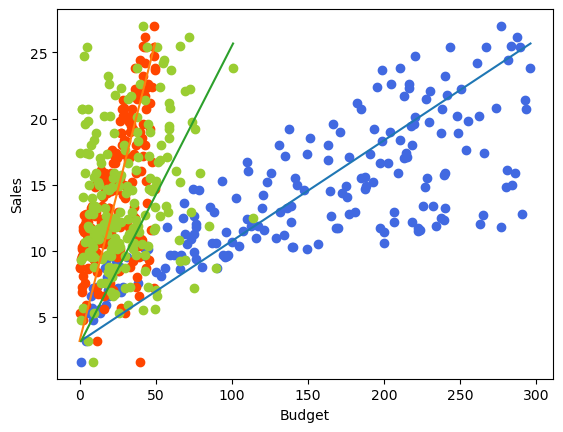

In [21]:
min_pt_full = model_full.predict([X_train_full.min()])
max_pt_full = model_full.predict([X_train_full.max()])
plt.plot(df['TV'], df['sales'], 'o', color='royalblue')
plt.plot(df['radio'], df['sales'], 'o', color='orangered')
plt.plot(df['newspaper'], df['sales'], 'o', color='yellowgreen')
plt.plot([X_train_full.min(), X_train_full.max()], [min_pt_full, max_pt_full])
plt.xlabel('Budget')
plt.ylabel('Sales')

Even though we only plotted one function, we see three drawn. This is because of the three features we discussed earlier. Each dimension has their own coefficient. Since we are predicting values using three X-coordinates (X_train_full.min() contains the minumum value of X_train_full, which has three dimensions and will thus return three values, the same foes for X_train_full.max()) we get three functions drawn.

As said before, to visualize the function of our final model we have to manually build the predicted values, this time by adding all three functions to each other using the formula $f(x) = a + bx + cx + dx + ...$

C:\Users\billo\AppData\Local\Temp\ipykernel_1888\45814525.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_pt_full = (X_train_full.min()[0] * model_full.coef_[0]) + (X_train_full.min()[1] * model_full.coef_[1]) + (X_train_full.min()[2] * model_full.coef_[2]) + model_full.intercept_
C:\Users\billo\AppData\Local\Temp\ipykernel_1888\45814525.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_pt_full = (X_train_full.max()[0] * model_full.coef_[0]) + (X_train_full.max()[1] * model_full.coef_[1]) + (X_train_full.max()[2] * model_full.coef_[2]) + model_full.intercept_
C:\Users\billo\AppData\Local\Temp\ipykernel_

Text(0, 0.5, 'Sales')

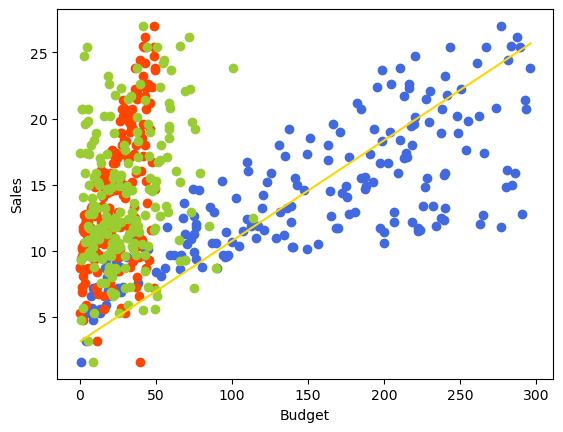

In [22]:
min_pt_full = (X_train_full.min()[0] * model_full.coef_[0]) + (X_train_full.min()[1] * model_full.coef_[1]) + (X_train_full.min()[2] * model_full.coef_[2]) + model_full.intercept_
max_pt_full = (X_train_full.max()[0] * model_full.coef_[0]) + (X_train_full.max()[1] * model_full.coef_[1]) + (X_train_full.max()[2] * model_full.coef_[2]) + model_full.intercept_
plt.plot(df['TV'], df['sales'], 'o', color='royalblue')
plt.plot(df['radio'], df['sales'], 'o', color='orangered')
plt.plot(df['newspaper'], df['sales'], 'o', color='yellowgreen')
plt.plot([X_train_full.min()[0], X_train_full.max()[0]], [min_pt_full, max_pt_full], color='gold')
plt.xlabel('Budget')
plt.ylabel('Sales')

##### Question 12: Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?

In [23]:
campaign = [[149,22,12]]
model_full.predict(campaign)

c:\Users\billo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.93380216])

Using this data, we would expect our campaign to result in 13,9k units sold.